In [2]:
#Using yfinance library to read stocks
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time
import pandas_datareader
import scipy.stats as st
import matplotlib.dates as mdates

In [3]:
#Create list of stock tickers
symbols = ['FDX', 'UPS', 'TGT','GM','TM','LUV','DAL','TWTR','FB','WMT']
#stockfinal= pd.read_csv("outputData/stocks.csv")
stockfinal=pd.DataFrame()
stock=[]
#Read stocks in symols list, add to data frame
for ticker in symbols:
    stock=yf.download(ticker, start="2019-01-01", end="2020-12-31")
    if len(stock)!=0:
        stock["Name"]=ticker
        stockfinal=stockfinal.append(stock, sort=False)
#write data frame to csv file
stockfinal.to_csv("outputData/stocks.csv", encoding = 'utf-8')
stockfinal

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2019-01-02,158.520004,163.380005,157.570007,163.190002,158.252838,2125700,FDX
2019-01-03,161.789993,163.070007,156.960007,157.190002,152.434372,3033300,FDX
2019-01-04,160.199997,164.979996,159.500000,164.429993,159.455338,2938600,FDX
2019-01-07,164.889999,166.850006,162.149994,166.729996,161.685776,2989400,FDX
2019-01-08,168.699997,169.419998,165.309998,167.020004,161.966980,2610700,FDX
...,...,...,...,...,...,...,...
2020-12-23,143.539993,144.220001,142.300003,143.220001,143.220001,6810200,WMT
2020-12-24,143.539993,144.389999,143.179993,143.500000,143.500000,3018200,WMT
2020-12-28,144.039993,145.300003,143.330002,145.220001,145.220001,6448300,WMT


In [4]:
#create new data frame grouped by ticker name and calculate common describe() statistics elements
stock_group=stockfinal.groupby("Name")
stock_describe=stock_group["Close"].describe()
stock_describe

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
DAL,504.0,45.129881,13.342683,19.190001,31.199999,50.330000,57.187500,63.160000
FB,504.0,208.017579,39.598348,131.740005,179.985001,196.760002,235.744995,303.910004
FDX,504.0,176.419246,46.649264,90.489998,151.082500,163.309998,184.032497,301.450012
GM,504.0,34.000179,6.110743,16.799999,29.827500,35.840000,38.437500,46.459999
LUV,504.0,46.537341,9.122355,23.870001,38.265000,50.425001,53.852499,58.540001
TGT,504.0,112.107957,29.655817,65.529999,86.197500,110.540001,125.820002,179.820007
TM,504.0,130.135397,8.756029,108.500000,122.907503,129.389999,136.574997,155.089996
TWTR,504.0,36.362024,6.372567,22.000000,31.607501,35.765001,40.360001,55.869999
UPS,504.0,120.197064,24.729566,86.169998,102.074997,114.375000,121.247498,176.539993


In [5]:
#Find min and max of each ticker
mins=stock_group["Close"].min()
maxs=stock_group["Close"].max()
#create data frame to keep rows of min and max for each ticker
mins_data=pd.DataFrame()
maxs_data=pd.DataFrame()
#Reset data frme index since the initial index is on date but in order to find correct date of ticker, date column should be as regular column
stockfinal=stockfinal.reset_index()
for ticker in symbols:
    mins_data=mins_data.append(stockfinal[(stockfinal["Name"]==ticker) & (stockfinal["Close"]==mins[ticker])])
    maxs_data=maxs_data.append(stockfinal[(stockfinal["Name"]==ticker) & (stockfinal["Close"]==maxs[ticker])])
#Show info for mins of each ticker
mins_data

,Date,Open,High,Low,Close,Adj Close,Volume,Name
302,2020-03-16,92.000000,99.870003,90.489998,90.489998,89.600357,4417400,FDX
804,2020-03-12,82.220001,92.440002,82.000000,86.169998,84.222221,9412800,UPS
1009,2019-01-03,66.129997,66.629997,65.410004,65.529999,62.248390,4562200,TGT
1816,2020-03-18,18.830000,19.049999,14.330000,16.799999,16.799999,39591100,GM
2318,2020-03-16,110.000000,112.510002,108.010002,108.500000,106.602600,409400,TM
2865,2020-05-15,24.370001,24.870001,23.750000,23.870001,23.870001,18679800,LUV
3369,2020-05-15,18.969999,19.650000,18.620001,19.190001,19.190001,46861800,DAL
3832,2020-03-18,22.950001,23.490000,20.000000,22.000000,22.000000,31012700,TWTR
4033,2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900,FB
4537,2019-01-03,93.209999,94.709999,92.699997,92.860001,89.522263,8277300,WMT


In [6]:
#Show info for maxs of each ticker
maxs_data

,Date,Open,High,Low,Close,Adj Close,Volume,Name
488,2020-12-08,298.000000,303.649994,297.720001,301.450012,300.776428,2889100,FDX
952,2020-10-12,174.860001,176.800003,174.210007,176.539993,175.469986,2274000,UPS
1488,2020-11-25,177.729996,180.479996,177.350006,179.820007,179.820007,3780700,TGT
1991,2020-11-24,45.910000,46.709999,45.070000,46.459999,46.459999,20048700,GM
2510,2020-12-16,154.160004,155.479996,153.000000,155.089996,155.089996,266100,TM
2801,2020-02-13,58.060001,58.689999,57.849998,58.540001,58.315563,2401800,LUV
3158,2019-07-16,61.880001,63.259998,61.720001,63.160000,61.866245,10319700,DAL
3164,2019-07-24,62.389999,63.439999,62.380001,63.160000,62.263969,5718800,DAL
4024,2020-12-18,54.930000,56.080002,54.270000,55.869999,55.869999,20450300,TWTR
4448,2020-08-26,284.000000,304.670013,284.000000,303.910004,303.910004,69015200,FB


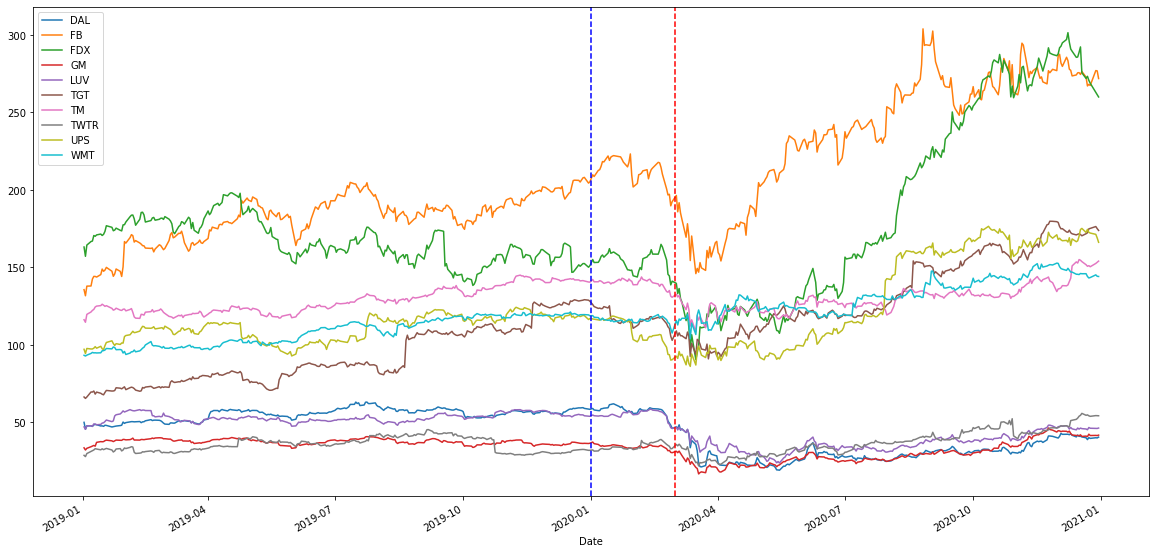

In [7]:
#Create a comparable plot for all tickers in data frame 
plt.figure(figsize=(20, 10))
stock_group["Close"].plot()
plt.axvline(x='2020-3-1',color='r',linestyle='--')
plt.axvline(x='2020-1-1',color='b',linestyle='--')
plt.legend()
plt.show()

In [8]:
#create function to claculate linear regression, draw plot, draw linear regression for each couple of tickers
def linear_reg(x,y,dfName, dfName1):
    #create data frame according to the tickers name passed to function
    ticker_df=stockfinal[stockfinal["Name"]==str(dfName)]
    ticker_df1=stockfinal[stockfinal["Name"]==str(dfName1)]
    #chage type of date to number to be able to use for linear regression, date type cannot be used for linear regression
    if x=="Date" or y=="Date":
        date_num=ticker_df[x].map(dt.datetime.toordinal)
    #calculate linear regression for both tickers passed to function and save related elements of linear regression
    slope, intercept, r_value, p_value, std_err=st.linregress(date_num,ticker_df[y])
    slope1, intercept1, r_value1, p_value1, std_err1=st.linregress(date_num,ticker_df1[y])
    #Calculate regaression value for both tickers
    regression_value=date_num*slope+intercept
    regression_value1=date_num*slope1+intercept1
    plt.figure(figsize=(20, 10))
    #draw plot for bothe tickers according to the columns passed to function (Price plot)
    plt.plot(ticker_df[x], ticker_df[y])
    plt.plot(ticker_df1[x], ticker_df1[y])
    #draw regression lines for each data frame
    plt.plot(ticker_df[x], regression_value, color='red')
    plt.plot(ticker_df1[x], regression_value1, color='purple')
    #equation formula in text format
    eq= f"{(dfName)} y = {round(slope, 2)}x + {round(intercept, 2)}"
    eq1= f"{(dfName1)} y = {round(slope1, 2)}x + {round(intercept1, 2)}"
    #if one of fields passed to function is date, xy of showing equation text should be calculated to number to point on x,y of plot sheet
    if x=="Date" or y=="Date":
        ab=(mdates.date2num(dt.datetime(2019,3,1)), (ticker_df[y].mean()))
        ab1=(mdates.date2num(dt.datetime(2019,3,1)), (ticker_df1[y].mean()))
    else:
        ab=(ticker_df[x].mean(), ticker_df[y].mean())
        ab1=(ticker_df1[x].mean(), ticker_df1[y].mean())
    #draw regression line for each data frame    
    plt.annotate(eq,ab, color='red', fontsize=16)
    plt.annotate(eq1,ab1, color='purple', fontsize=16)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend([dfName, dfName1])
    t=f"Plot for {dfName} and {dfName1} stocks"
    plt.title(t)
    plt.show()
    #print rvalue and pvalue of each ticker
    print(f"For {dfName} the r-value is: {r_value} and p-value is: {p_value}")
    print(f"For {dfName1} the r-value is: {r_value1} and p-value is: {p_value1}")

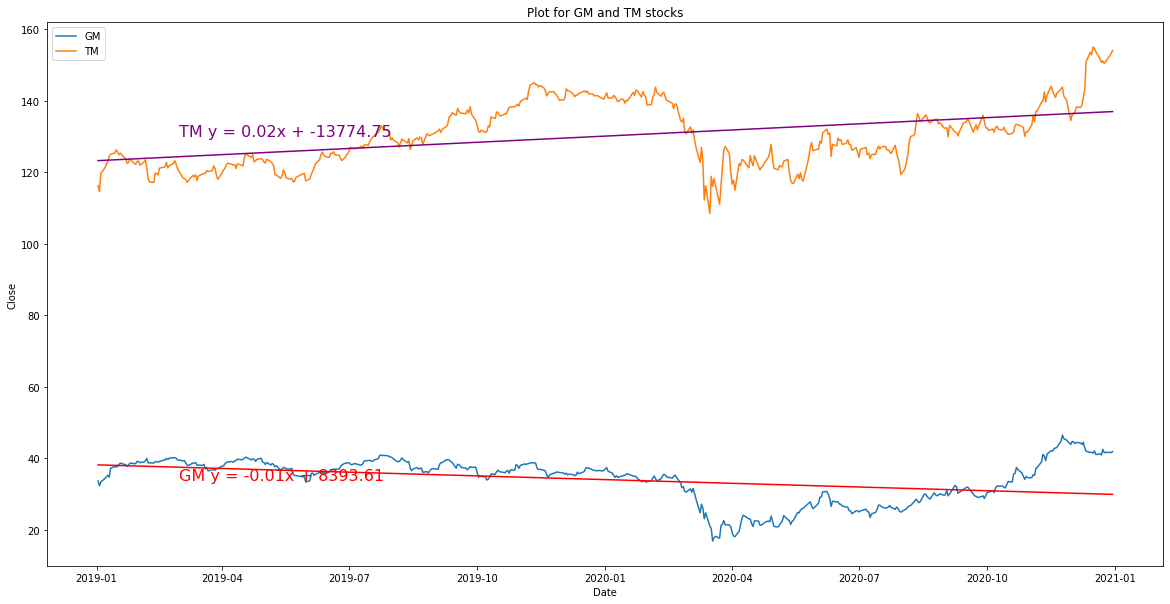

For GM the r-value is: -0.3910429251917474 and p-value is: 7.315235775821704e-20
For TM the r-value is: 0.453933650101433 and p-value is: 5.475339457043852e-27


In [9]:
#Linear regression for GM and TM
linear_reg("Date", "Close", "GM", "TM")

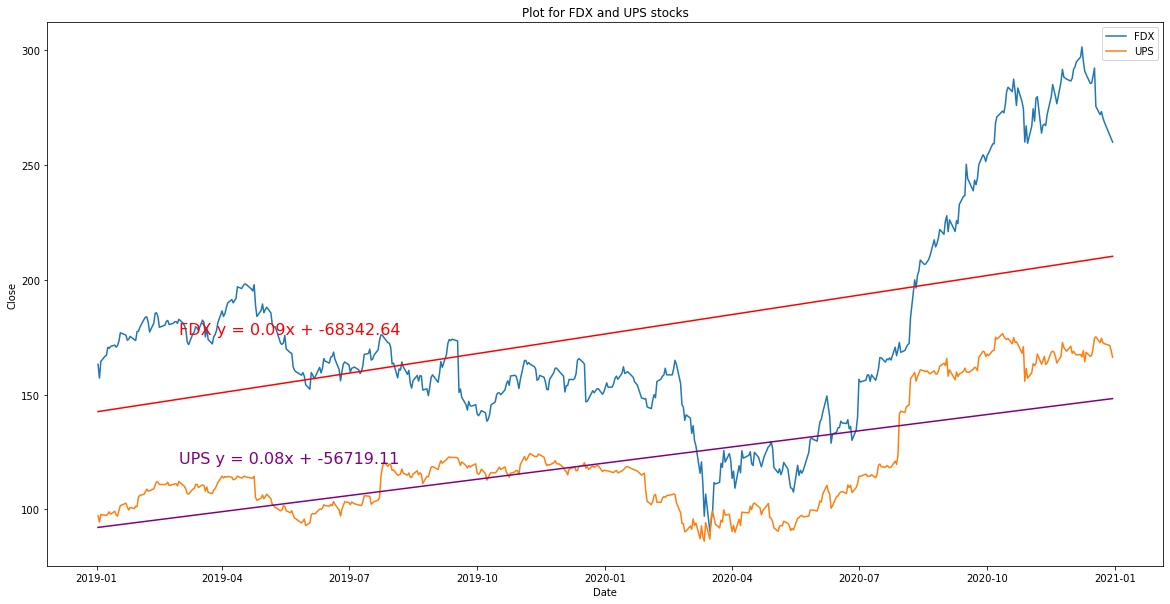

For FDX the r-value is: 0.4198544855698684 and p-value is: 6.099726664063255e-23
For UPS the r-value is: 0.6569986630989878 and p-value is: 1.3860879504411624e-63


In [10]:
#Linear regression for FDX and UPS
linear_reg("Date", "Close", "FDX", "UPS")

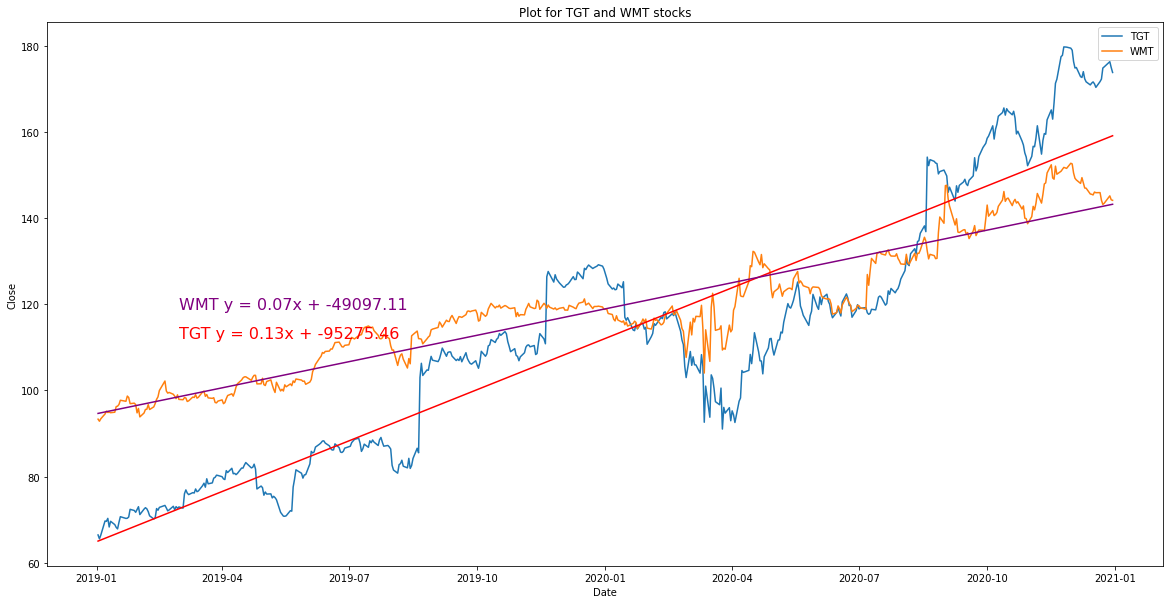

For TGT the r-value is: 0.9194202893388874 and p-value is: 1.3367257614437975e-205
For WMT the r-value is: 0.9397228373123834 and p-value is: 4.161699355689644e-236


In [11]:
#Linear regression for TGT and WMT
linear_reg("Date", "Close", "TGT", "WMT")

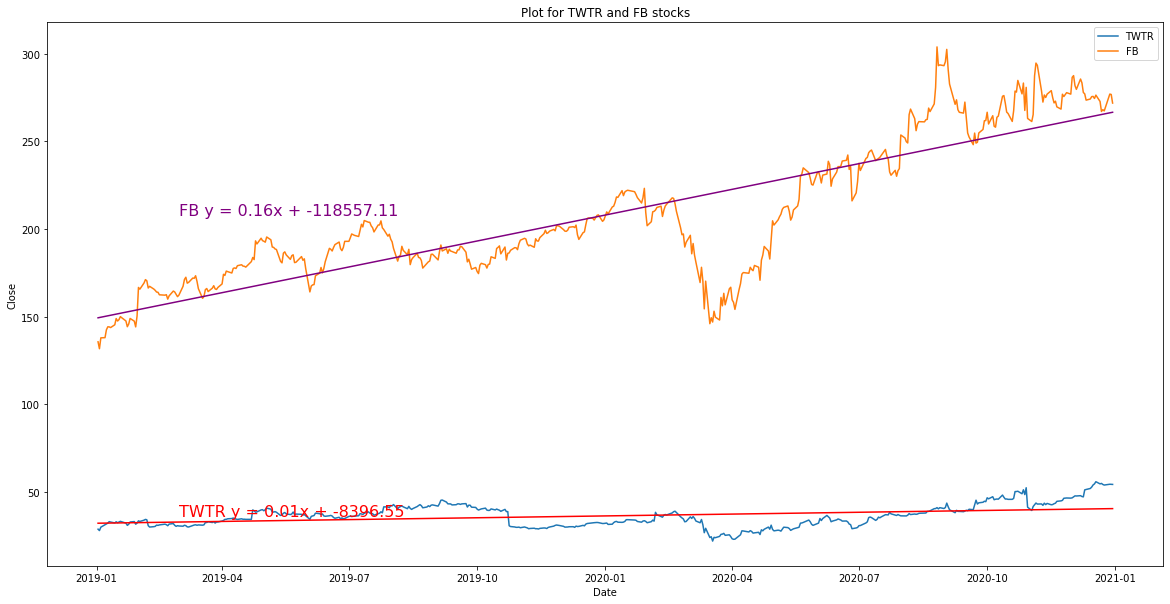

For TWTR the r-value is: 0.3782642248637072 and p-value is: 1.3679935708198156e-18
For FB the r-value is: 0.8573222282032655 and p-value is: 7.113035142287852e-147


In [12]:
#Linear regression for TWTR and FB
linear_reg("Date", "Close", "TWTR","FB")

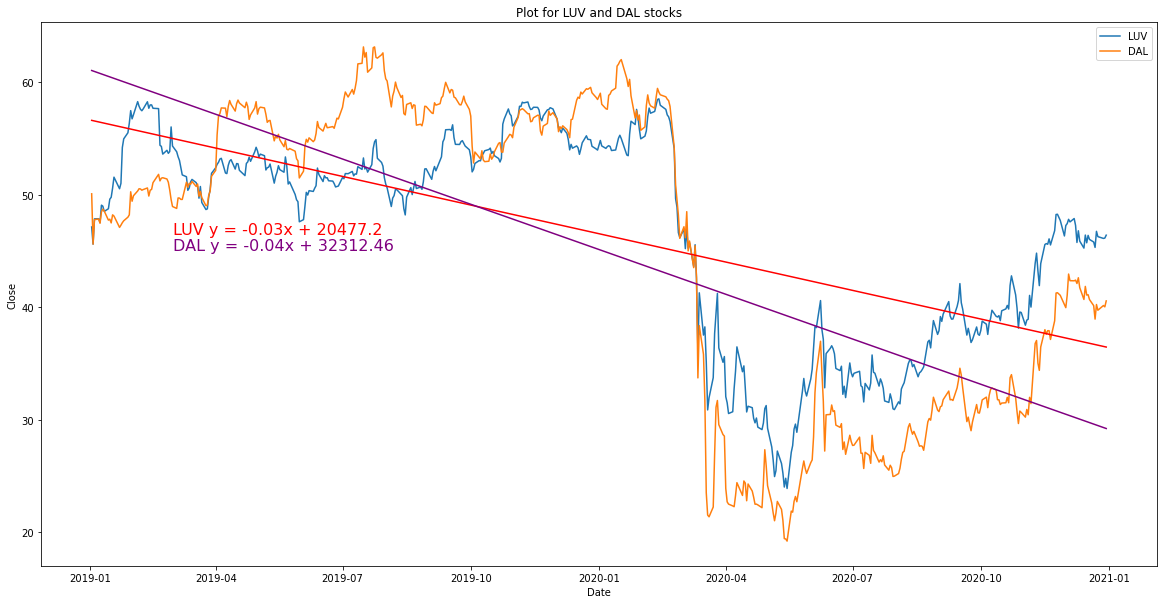

For LUV the r-value is: -0.6401883390286666 and p-value is: 1.8073385308816985e-59
For DAL the r-value is: -0.6912768580169771 and p-value is: 7.49100830448218e-73


In [13]:
#Linear regression for LUV and DAL
linear_reg("Date", "Close", "LUV","DAL")